## Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import json
import os
from statistics import mean, stdev
from pprint import pprint
import numpy as np

## Read json result files

In [2]:
# result_base_path = "./store_with_leq_topk10"
result_base_path = "./store"

folders = os.listdir(result_base_path)
print(len(folders))

60


In [3]:
results_dict = dict((trainer_type, {'Random': {
    'iter_accuracy': [],
    'iter_recall': [],
    'iter_precision': [],
    'iter_f1': [],
    'iter_mae_model_error': []
},
    'ActiveLR': {'iter_accuracy': [],
                 'iter_recall': [],
                 'iter_precision': [],
                 'iter_f1': [],
                 'iter_mae_model_error': []
                 }
}) for trainer_type in ['full-oracle', 'learning-oracle', 'uninformed-bayesian'])

for folder in folders:
    trainer_type, sampling_method, _ = folder.split("_")
    with open(os.path.join(result_base_path, folder, "study_metrics.json"), 'r') as fp:
        study_metrics = json.load(fp)
        for metric_type in ['iter_accuracy', 'iter_recall', 'iter_precision', 'iter_f1', 'iter_mae_model_error']:
            if sampling_method == 'RANDOM':
                results_dict[trainer_type]['Random'][metric_type].append([list(range(1, len(
                    study_metrics[metric_type])+1)), study_metrics['elapsed_time'], study_metrics[metric_type]])
            elif sampling_method == 'ACTIVELR':
                results_dict[trainer_type]['ActiveLR'][metric_type].append([list(range(1, len(
                    study_metrics[metric_type])+1)), study_metrics['elapsed_time'], study_metrics[metric_type]])

# pprint(results_dict)


## Compute Average time and accuracy

In [4]:
'''For Random'''
average_dict = dict((trainer_type, {'Random': {
    'iter_accuracy': [],
    'iter_recall': [],
    'iter_precision': [],
    'iter_f1': [],
    'iter_mae_model_error': []
},
    'ActiveLR': {'iter_accuracy': [],
                 'iter_recall': [],
                 'iter_precision': [],
                 'iter_f1': [],
                 'iter_mae_model_error': []}
}) for trainer_type in ['full-oracle', 'learning-oracle', 'uninformed-bayesian'])

for trainer_type in ['full-oracle', 'learning-oracle', 'uninformed-bayesian']:
    for sampling_type in ['Random', 'ActiveLR']:
        for metric_type in ['iter_accuracy', 'iter_recall', 'iter_precision', 'iter_f1', 'iter_mae_model_error']:
            for exp_metrics_lst in zip(*results_dict[trainer_type][sampling_type][metric_type]):
                average_lst = []
                # print(exp_metrics_lst)

                max_len = max(len(exp_metric) for exp_metric in exp_metrics_lst)
                # print(max_len)
                for idx in range(max_len):
                    candidate_lst = [exp_metric[idx] for exp_metric in exp_metrics_lst if idx < len(
                        exp_metric) and str(exp_metric[idx]) != 'nan']
                    if candidate_lst:
                        average_lst.append(mean(candidate_lst))
                    else:
                        average_lst.append(np.nan)
                average_dict[trainer_type][sampling_type][metric_type].append(average_lst)
        # print(average_dict[sampling_type][metric_type])
# print(average_dict)


In [5]:
# '''For Random'''
# average_dict = {'Random': {
#     'iter_accuracy': [],
#     'iter_recall': [],
#     'iter_precision': [],
#     'iter_f1': []
# },
#     'ActiveLR': {
#     'iter_accuracy': [],
#     'iter_recall': [],
#     'iter_precision': [],
#     'iter_f1': []
# }
# }
# for sampling_type in ['Random', 'ActiveLR']:
#     for metric_type in ['iter_accuracy', 'iter_recall', 'iter_precision', 'iter_f1']:
#         for val in zip(*results_dict[sampling_type][metric_type]):
#             idx = 0
#             average_vals = []
#             candidate_vals = []
#             end = False
#             while not end:
#                 end = True
#                 for exp_lst in val:
#                     if idx < len(exp_lst) and (str(exp_lst[idx]) != 'nan'):
#                         '''If any found then end is false'''
#                         candidate_vals.append(exp_lst[idx])
#                         end = False
#                 else:
#                     idx += 1
#                     # print(mean(candidate_vals), candidate_vals)
#                     print(candidate_vals)
#                     average_vals.append(mean(candidate_vals))

#             average_dict[sampling_type][metric_type].append(average_vals)


In [6]:
# pprint(average_dict)

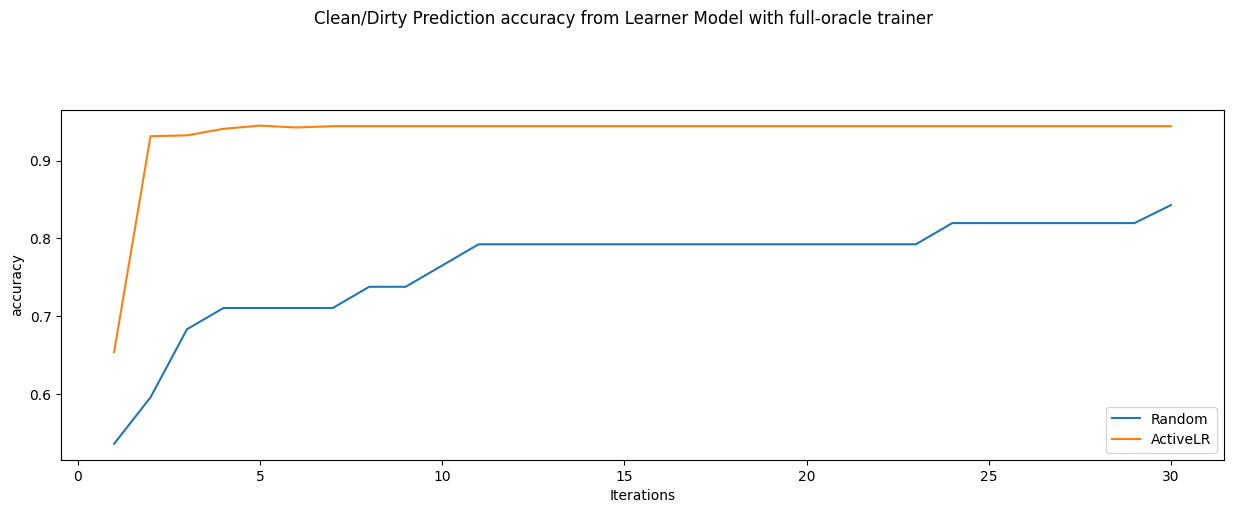

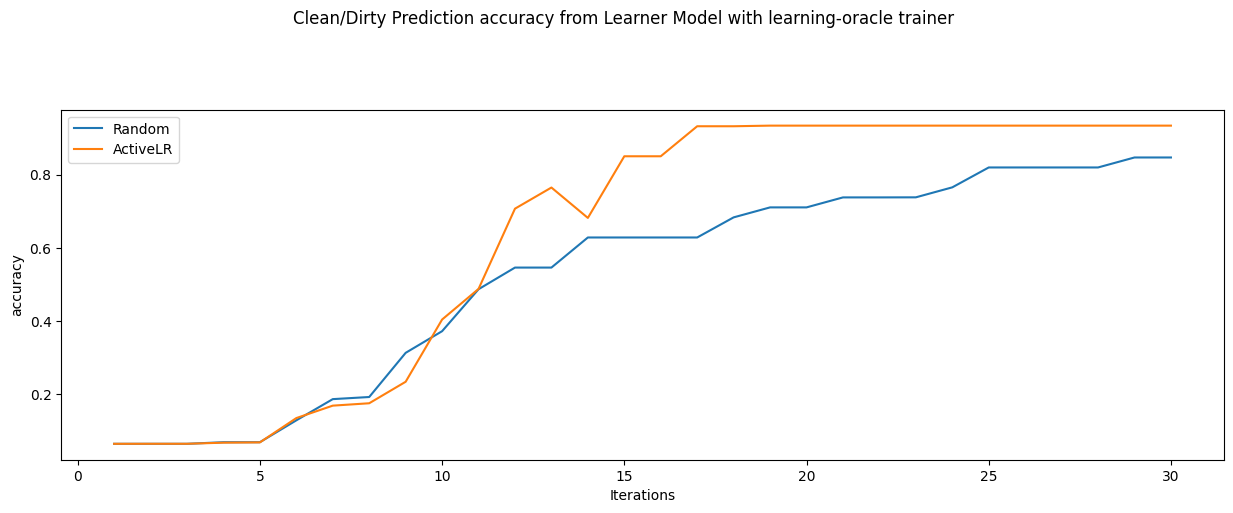

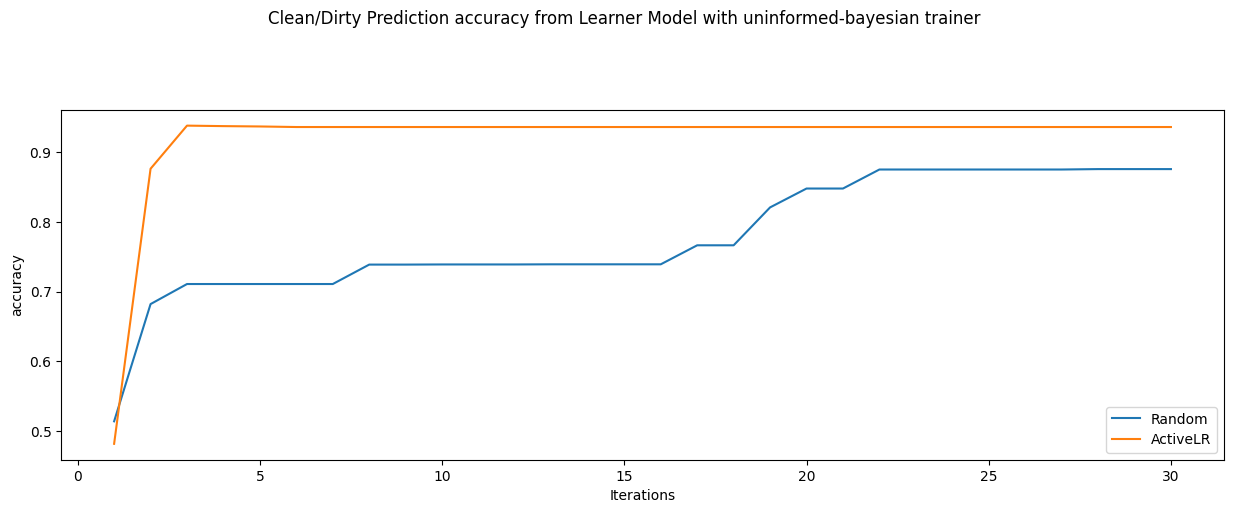

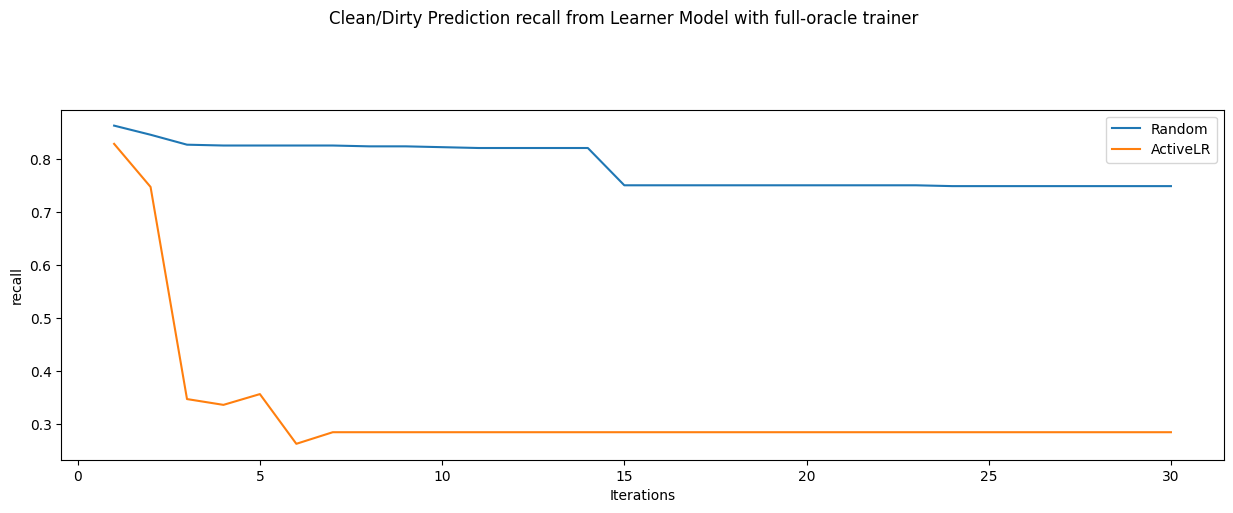

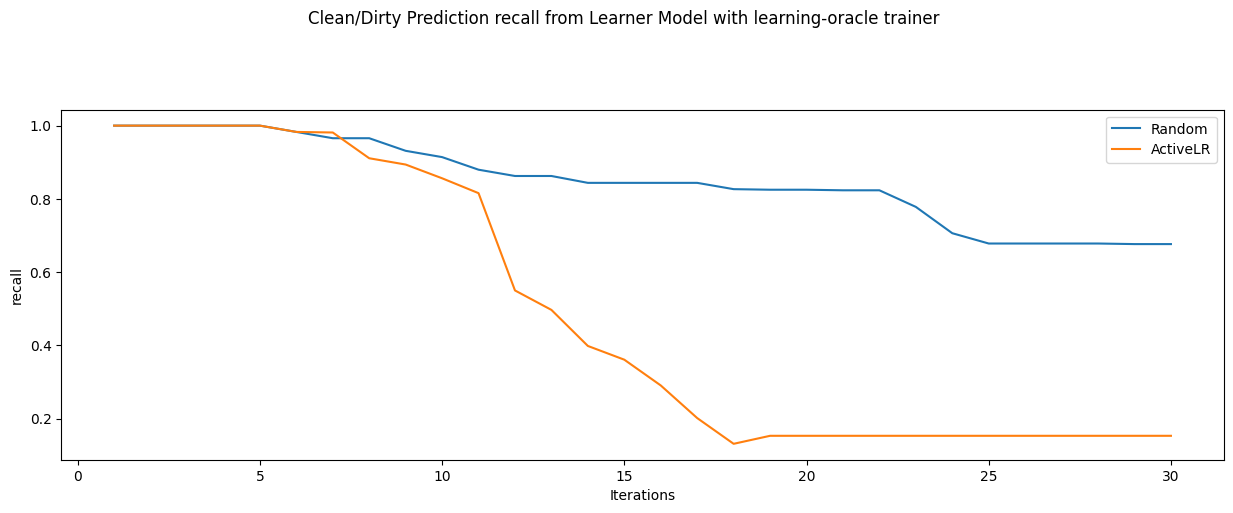

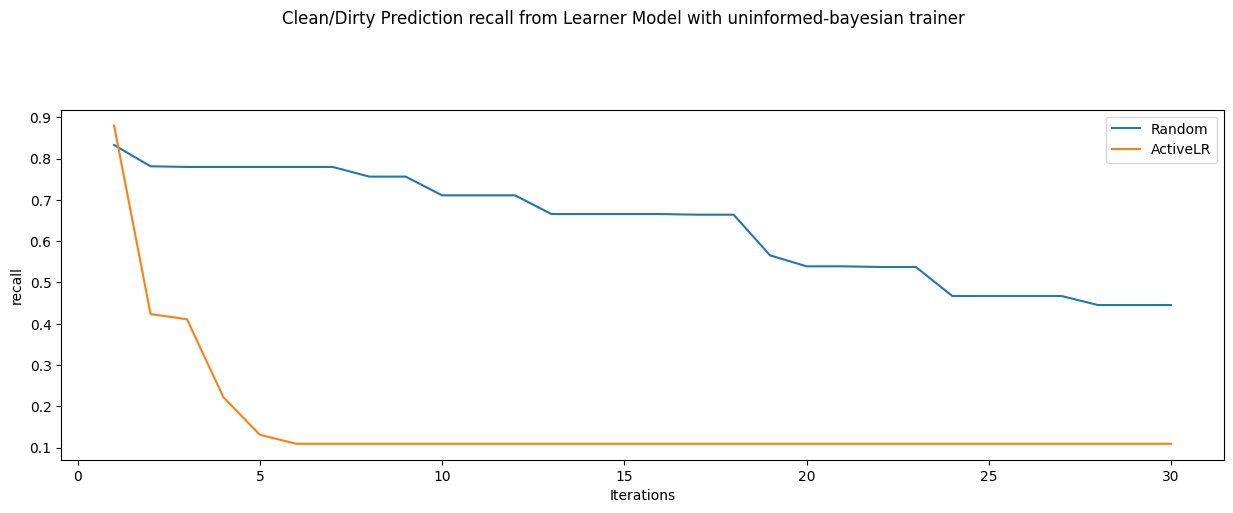

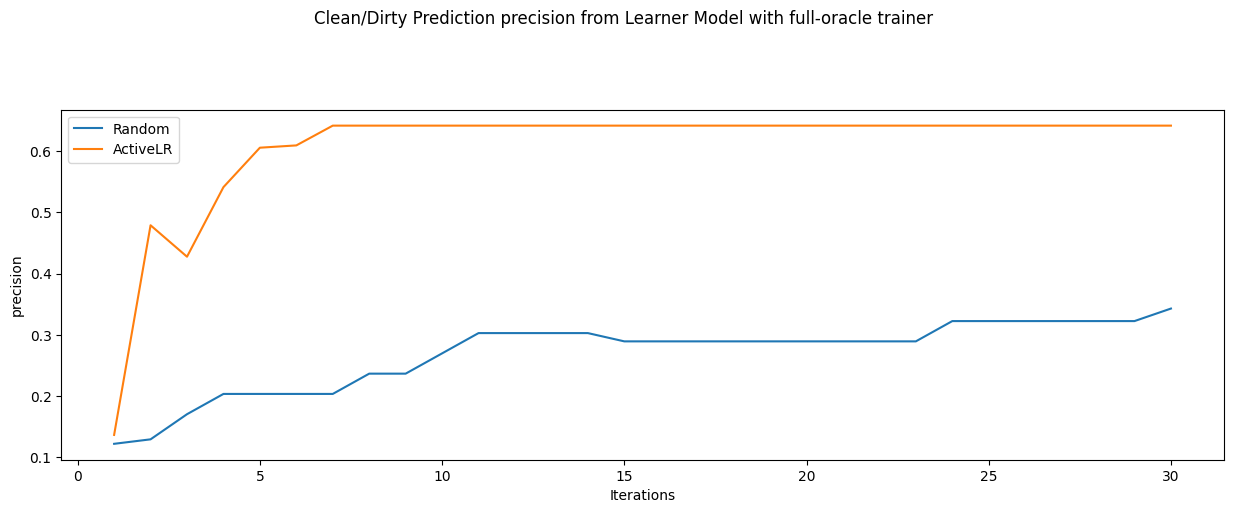

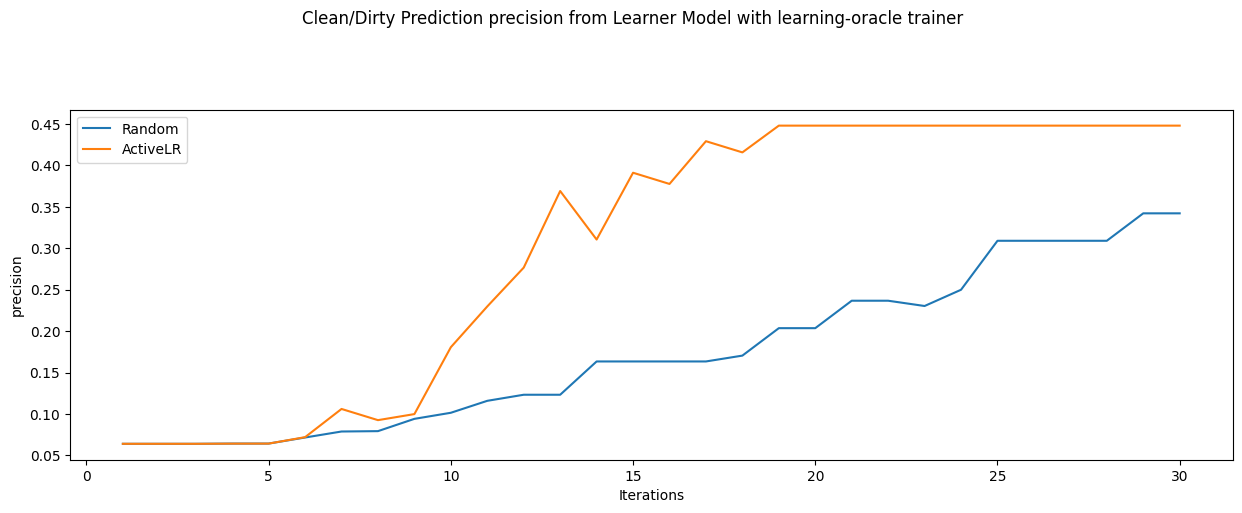

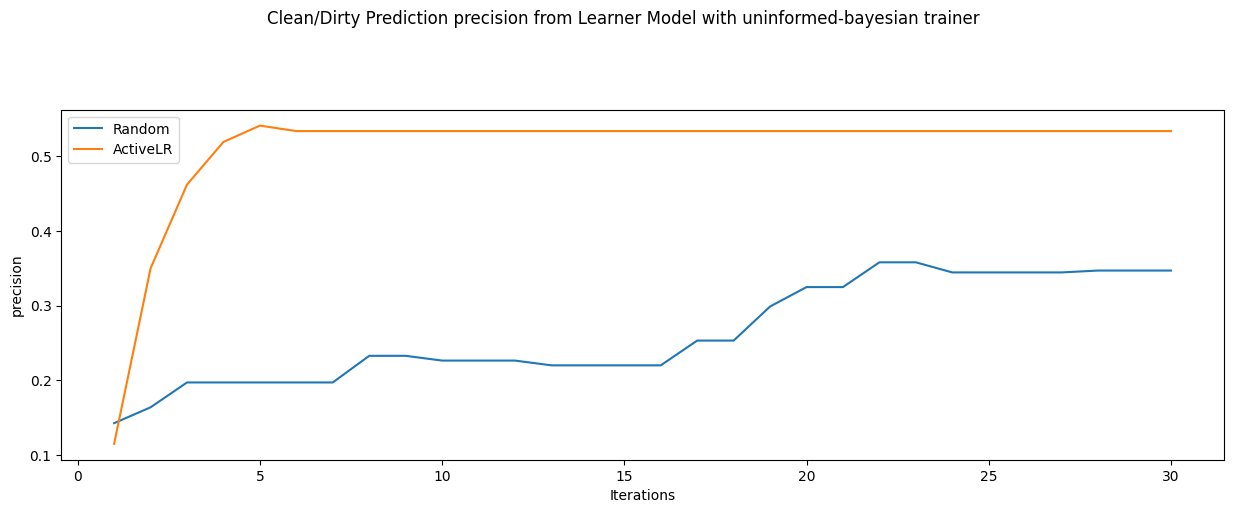

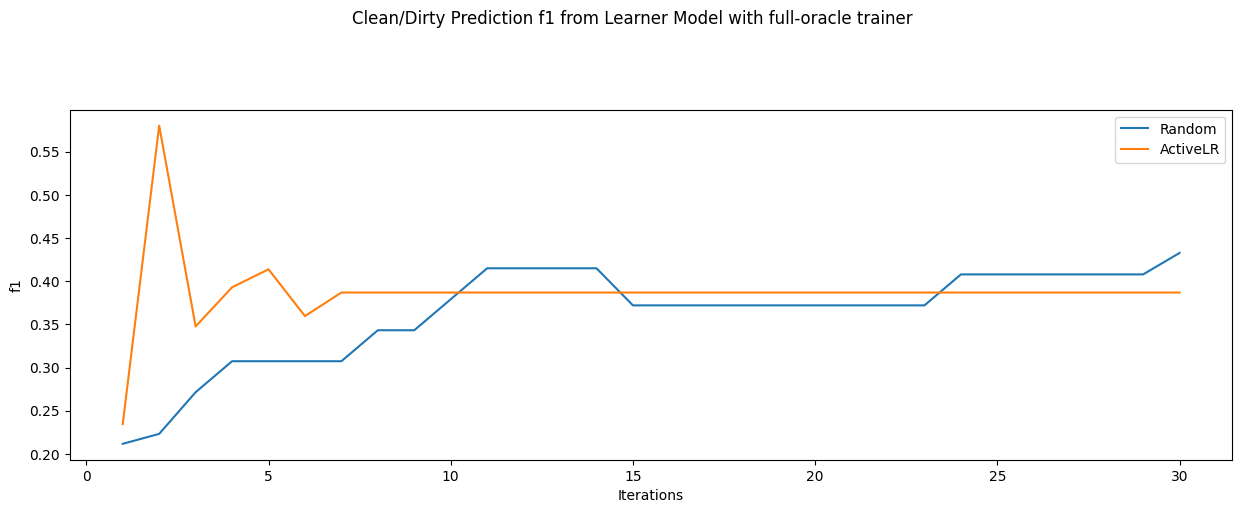

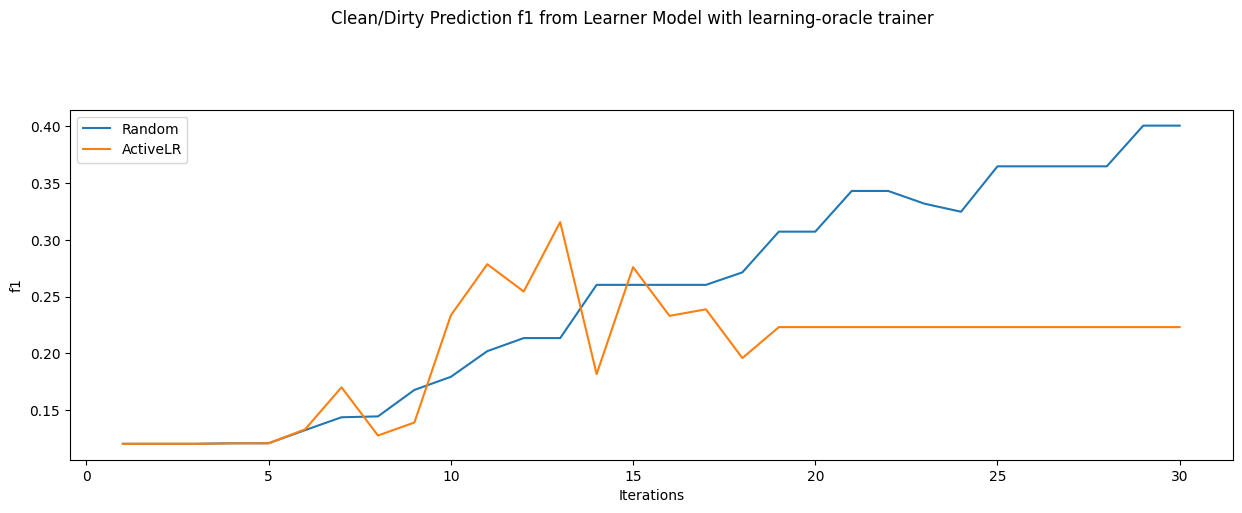

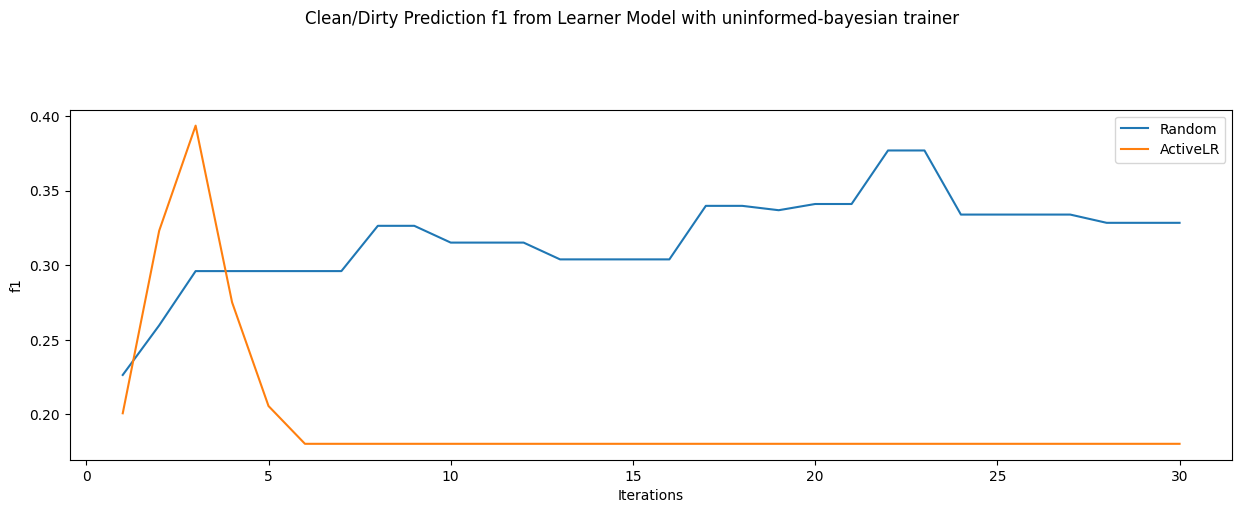

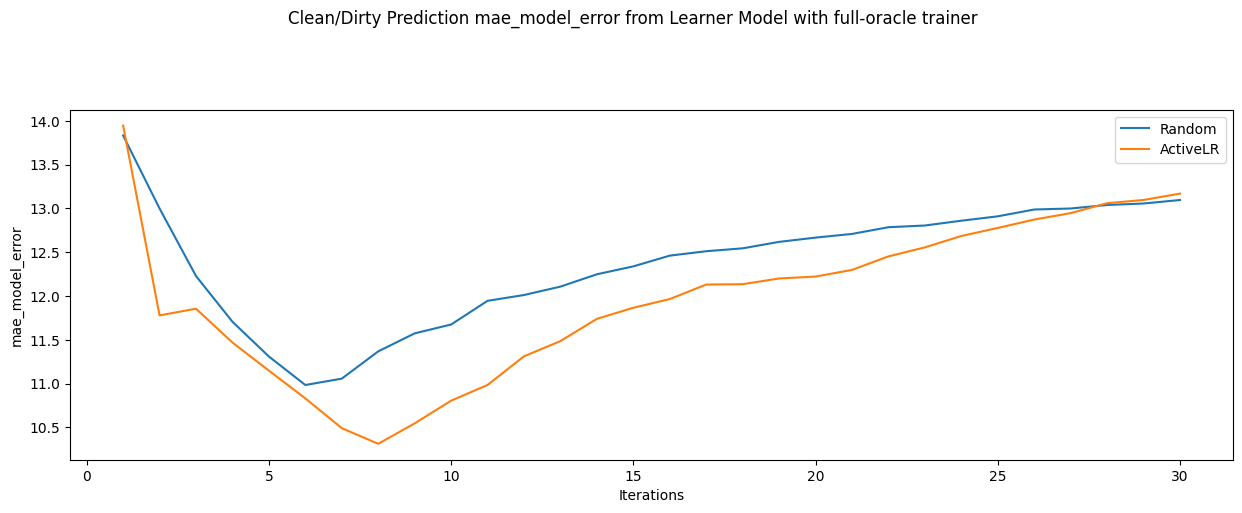

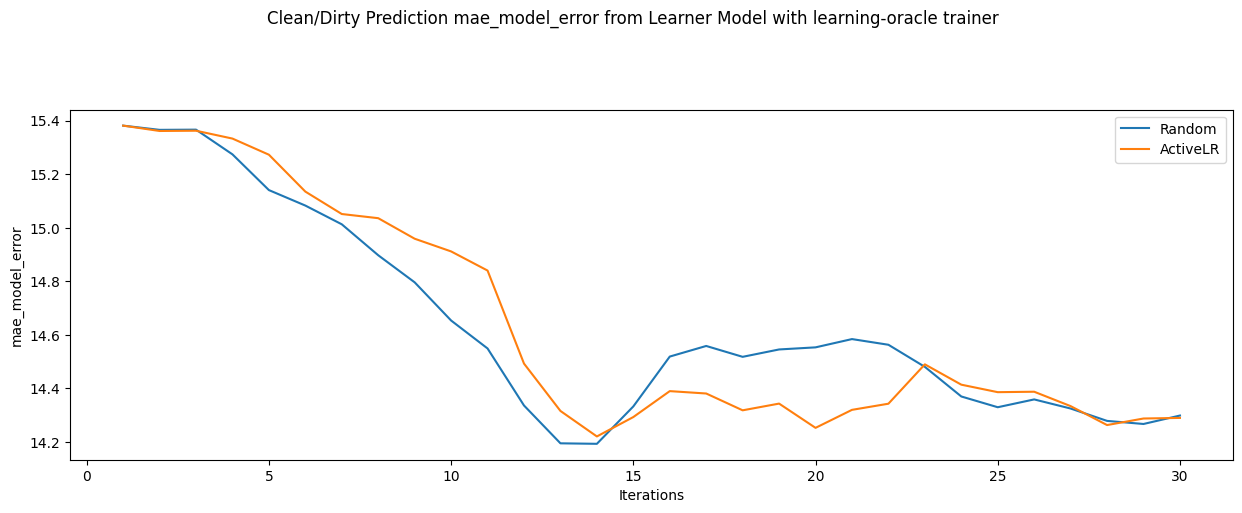

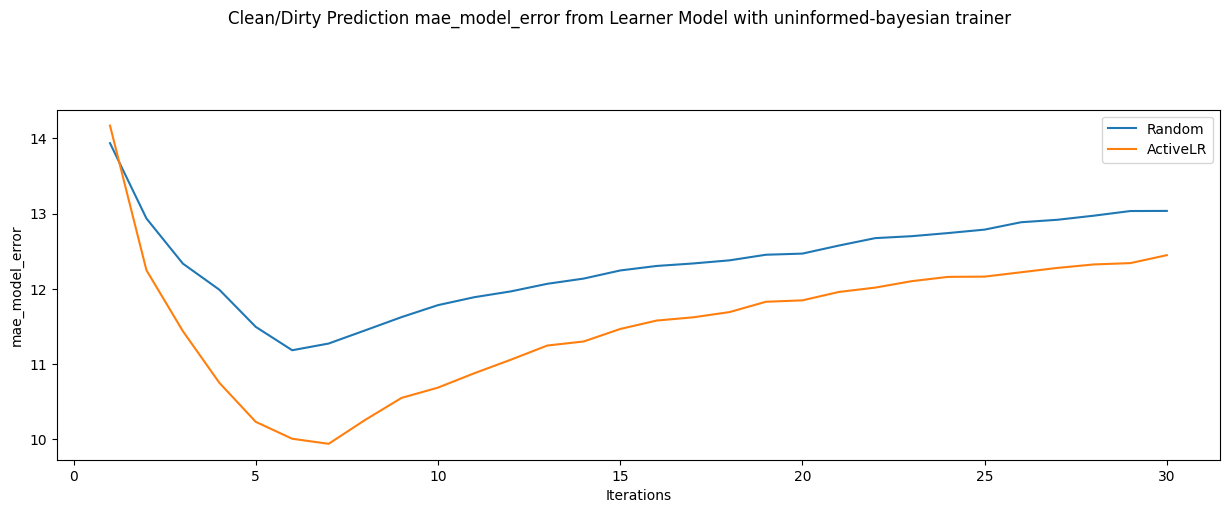

In [8]:
for metric in ['accuracy', 'recall', 'precision', 'f1', 'mae_model_error']:
# for metric in ['accuracy', 'f1', 'recall', 'precision']:
    for trainer_type in ['full-oracle', 'learning-oracle', 'uninformed-bayesian']:
    # for metric in ['accuracy','mae_model_error']:
        plt.figure(figsize=(15,10))
        plt.subplot(2,1,1)
        plt.plot(average_dict[trainer_type]['Random'][f'iter_{metric}'][0], average_dict[trainer_type]['Random'][f'iter_{metric}'][2], label='Random')
        plt.plot(average_dict[trainer_type]['ActiveLR'][f'iter_{metric}'][0], average_dict[trainer_type]['ActiveLR'][f'iter_{metric}'][2], label='ActiveLR')
        plt.xlabel('Iterations')
        plt.ylabel(metric)
        plt.legend()
        # plt.subplot(2,1,2)
        # plt.plot(average_dict[trainer_type]['Random'][f'iter_{metric}'][1], average_dict[trainer_type]['Random'][f'iter_{metric}'][2], label='Random')
        # plt.plot(average_dict[trainer_type]['ActiveLR'][f'iter_{metric}'][1], average_dict[trainer_type]['ActiveLR'][f'iter_{metric}'][2], label='ActiveLR')
        # plt.xlabel('Time')
        # plt.ylabel(metric)
        # plt.legend()
        plt.suptitle(f"Clean/Dirty Prediction {metric} from Learner Model with {trainer_type} trainer")
        plt.show()